# Air quality project

## Project and data description

### Data

The dataset consists air quality data (the concentrations of particulate matter PM1, PM2.5 and PM10, temperature, air pressure and humidity) from 2017 generated by network of 56 low-cost sensors located in Krakow, Poland. 

The data is divided into 12 files- one for each month. Each row represent single represents a single measurement. Each column shows measured amount:

- date nad time in UTC (Coordinated Universal Time) 

As Krakow, Poland is located in UTC+1 (in winter) and UTC+2 (in summer) final forecas should take under consideration this difference.  

- temperature

Air temperature measured in Celcius degrees- standard temprerature unit for Poland

- humidity

Current air humidity presented in percentages 

- pressure

Current air pressure presented in Pascals. May require conversion to hectopascals as it is a common unit for presenting air pressure value for forecast


Next, we can find three columns with measured particular matter in 3 cattegories- each in separate column:  

- pm10

Current value of particulate matter with size less than 10 μm (micrometre). Presented in μg/m3 (microgram on cubic metres). 

According to norms set by Chief Inspectorate of Environmental Protection (Główny Inspektorat Ochrony Środowiska- GIOŚ) the daily average concentrations of PM10 should not exceed 50 micrograms per cubic meter. 

- pm25

Amount of particulate matter with size less than 2.5 μm. Shows concentracion level in μg/m3. 

The amout is given in  Simirally as particular matter with size less than 1μm, it can also penetrate from lungs to blood. 

According to norms set by GIOŚ the daily average concentrations of PM2.5 should not exceed 25 micrograms per cubic meter. 

- pm1

Measured level of particulate matter with size less than 1 μm. Presented in μg/m3 (microgram on cubic metres). 

The allowable concentration for pm1 has not been defined.


The source of particulate matter in air are various kinds of combustion ex. domestic boiler rooms or even barbecues. As research of Chief Inspectorate of Environmental Protection (Główny Inspektorat Ochrony Środowiska- GIOŚ) shows, main source of this kind of air poluttion are low quality domestic heating stoves. Particular matter can easily penetrate from lungs to bloodstream. The smaller the particle, the more dangerous it is, as it can enter the bloodstream more easily. 

Each column name (except 'UTC time') has numeric prefix. The prefix is sensor id. For example in column named '140_humidity' we can find air humidity mesured by sensor number 140. 

There are 56 sensors, so as a result we get 337 columns (56 times 6 features + one UTC time column). 

### The goal

The goal of a project is to build a model for forecasting the amount of particulate matter pm1, pm 2.5 and pm 10, based on prior mesurements. 

## Preprocessing and analysis

### Imports

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import folium
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Uploading and transforming the data

The data are in separated 12 files- each for one month. We're uploading all files to one dataframe. 

In [2]:
def create_data_frame(path_to_files, file_name_end):
    all_data = []
    all_files = glob.glob(os.path.join(path_to_files,file_name_end))
    
    for path in all_files:
        frame = pd.read_csv(path)
        all_data.append(frame)
    
    df = pd.concat(all_data, axis=0, ignore_index=True)
    
    return df

In [3]:
root_path = r'C:\Users\User\PycharmProjects\Air_quality\Data_files'
file_name_like = '*2017.csv'

df = create_data_frame(root_path, file_name_like)

In [4]:
df

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0     2017-04-01T00:00:00            NaN         NaN         NaN    NaN   
1     2017-04-01T01:00:00            NaN         NaN         NaN    NaN   
2     2017-04-01T02:00:00            NaN         NaN         NaN    NaN   
3     2017-04-01T03:00:00            NaN         NaN         NaN    NaN   
4     2017-04-01T04:00:00            NaN         NaN         NaN    NaN   
...                   ...            ...         ...         ...    ...   
8588  2017-09-30T19:00:00            NaN         NaN         NaN    NaN   
8589  2017-09-30T20:00:00            NaN         NaN         NaN    NaN   
8590  2017-09-30T21:00:00            NaN         NaN         NaN    NaN   
8591  2017-09-30T22:00:00            NaN         NaN         NaN    NaN   
8592  2017-09-30T23:00:00            NaN         NaN         NaN    NaN   

      3_pm25  3_pm10  140_temperature  140_humidity  140_pressure  ...  \
0        NaN     NaN              6.0          92.0      101906.0  ...   
1        NaN     NaN              6.0          92.0      101869.0  ...   
2        NaN     NaN              5.0          94.0      101837.0  ...   
3        NaN     NaN              5.0          92.0      101834.0  ...   
4        NaN     NaN              4.0          94.0      101832.0  ...   
...      ...     ...              ...           ...           ...  ...   
8588     NaN     NaN              9.0          83.0      102373.0  ...   
8589     NaN     NaN              8.0          83.0      102374.0  ...   
8590     NaN     NaN              7.0          90.0      102380.0  ...   
8591     NaN     NaN              7.0          88.0      102380.0  ...   
8592     NaN     NaN              5.0          92.0      102390.0  ...   

      857_pressure  857_pm1  857_pm25  857_pm10  895_temperature  \
0              NaN      NaN       NaN       NaN              NaN   
1              NaN      NaN       NaN       NaN              NaN   
2              NaN      NaN       NaN       NaN              NaN   
3              NaN      NaN       NaN       NaN              NaN   
4              NaN      NaN       NaN       NaN              NaN   
...            ...      ...       ...       ...              ...   
8588      102337.0     35.0      35.0      72.0              8.0   
8589      102341.0     36.0      37.0      76.0              8.0   
8590      102349.0     38.0      39.0      79.0              6.0   
8591      102355.0     44.0      44.0      87.0              6.0   
8592      102368.0     47.0      48.0      91.0              5.0   

      895_humidity  895_pressure  895_pm1  895_pm25  895_pm10  
0              NaN           NaN      NaN       NaN       NaN  
1              NaN           NaN      NaN       NaN       NaN  
2              NaN           NaN      NaN       NaN       NaN  
3              NaN           NaN      NaN       NaN       NaN  
4              NaN           NaN      NaN       NaN       NaN  
...            ...           ...      ...       ...       ...  
8588          83.0      102383.0     37.0      36.0      67.0  
8589          83.0      102391.0     37.0      37.0      69.0  
8590          90.0      102402.0     45.0      45.0      79.0  
8591          88.0      102408.0     46.0      46.0      79.0  
8592          92.0      102417.0     39.0      39.0      71.0  

[8593 rows x 337 columns]

We're sorting the data frame by 'UTC time' column.

In [5]:
def sort_by_column(frame, column_name):
    sorted_frame = frame.sort_values(by=column_name)
    sorded_frame = sorted_frame.reset_index(drop=True)
    
    return sorted_frame

In [6]:
df = sort_by_column(df, 'UTC time')
df

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
2713  2017-01-01T00:00:00            NaN         NaN         NaN    NaN   
2714  2017-01-01T01:00:00            NaN         NaN         NaN    NaN   
2715  2017-01-01T02:00:00            NaN         NaN         NaN    NaN   
2716  2017-01-01T03:00:00            NaN         NaN         NaN    NaN   
2717  2017-01-01T04:00:00            NaN         NaN         NaN    NaN   
...                   ...            ...         ...         ...    ...   
2036  2017-12-24T20:00:00            NaN         NaN         NaN    NaN   
2037  2017-12-24T21:00:00            NaN         NaN         NaN    NaN   
2038  2017-12-24T22:00:00            NaN         NaN         NaN    NaN   
2039  2017-12-24T23:00:00            NaN         NaN         NaN    NaN   
2040  2017-12-25T00:00:00            NaN         NaN         NaN    NaN   

      3_pm25  3_pm10  140_temperature  140_humidity  140_pressure  ...  \
2713     NaN     NaN              NaN           NaN           NaN  ...   
2714     NaN     NaN              NaN           NaN           NaN  ...   
2715     NaN     NaN              NaN           NaN           NaN  ...   
2716     NaN     NaN              NaN           NaN           NaN  ...   
2717     NaN     NaN              NaN           NaN           NaN  ...   
...      ...     ...              ...           ...           ...  ...   
2036     NaN     NaN              6.0          87.0      101736.0  ...   
2037     NaN     NaN              6.0          88.0      101776.0  ...   
2038     NaN     NaN              6.0          85.0      101785.0  ...   
2039     NaN     NaN              5.0          88.0      101782.0  ...   
2040     NaN     NaN              6.0          88.0      101784.0  ...   

      857_pressure  857_pm1  857_pm25  857_pm10  895_temperature  \
2713           NaN      NaN       NaN       NaN              NaN   
2714           NaN      NaN       NaN       NaN              NaN   
2715           NaN      NaN       NaN       NaN              NaN   
2716           NaN      NaN       NaN       NaN              NaN   
2717           NaN      NaN       NaN       NaN              NaN   
...            ...      ...       ...       ...              ...   
2036      101726.0     12.0      15.0      31.0              5.0   
2037      101771.0     12.0      14.0      29.0              5.0   
2038      101788.0     10.0      12.0      26.0              5.0   
2039      101774.0      9.0      11.0      24.0              5.0   
2040      101774.0     10.0      11.0      23.0              5.0   

      895_humidity  895_pressure  895_pm1  895_pm25  895_pm10  
2713           NaN           NaN      NaN       NaN       NaN  
2714           NaN           NaN      NaN       NaN       NaN  
2715           NaN           NaN      NaN       NaN       NaN  
2716           NaN           NaN      NaN       NaN       NaN  
2717           NaN           NaN      NaN       NaN       NaN  
...            ...           ...      ...       ...       ...  
2036          85.0      101798.0     13.0      15.0      26.0  
2037          85.0      101840.0     12.0      13.0      23.0  
2038          82.0      101839.0     10.0      12.0      21.0  
2039          85.0      101837.0     10.0      12.0      21.0  
2040          85.0      101840.0     10.0      11.0      20.0  

[8593 rows x 337 columns]

### Sensor location

To better understand the data we're creating a map with sensor locations. 

First we're uploading data frame with sensors locations (from csv file). 

In [7]:
def upload_sensor_frame(file_path):
    
    sensor_loc_path = file_path
    sensor_loc_df = pd.read_csv(sensor_loc_path)
    #sensor_loc_df.set_index('id', drop=True)
    
    return sensor_loc_df

In [8]:
sensor_loc_path = r'C:\Users\User\PycharmProjects\Air_quality\Data_files\sensor_locations.csv'
location_frame = upload_sensor_frame(sensor_loc_path)

Now we're creating a map with markers pointing sensor location. After pointing the marker with the cursor, we can see the sensor id.  

In [9]:
def create_a_map(start_point, zoom):

    sensor_loc_map = folium.Map(
                                location=start_point,
                                zoom_start= zoom
                              )
    return sensor_loc_map

In [10]:
location=[50.057748,19.961375]
initial_zoom=12

empty_map = create_a_map(location, initial_zoom)

In [11]:
def add_markers(location_df, my_map):
    for _, sensor in location_df.iterrows():
        
        icon_color='blue'
        
        folium.Marker(location = [sensor['latitude'], sensor['longitude']],
                      #popup=sensor['id'],
                      tooltip=sensor['id'],
                      icon=folium.Icon(color=icon_color)
                     ).add_to(my_map)

    return my_map
        
sensor_map = add_markers(location_frame, empty_map)
sensor_map

### Data preparation

Firstly we reset the index. Next we convert UTC time values to datetime. 

In [12]:
df = df.reset_index(drop=True)

In [13]:
df['UTC time'] = pd.to_datetime(df['UTC time'])

Now basic peek into the data frame. 

In [14]:
df.head()

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  3_pm25  \
0 2017-01-01 00:00:00            NaN         NaN         NaN    NaN     NaN   
1 2017-01-01 01:00:00            NaN         NaN         NaN    NaN     NaN   
2 2017-01-01 02:00:00            NaN         NaN         NaN    NaN     NaN   
3 2017-01-01 03:00:00            NaN         NaN         NaN    NaN     NaN   
4 2017-01-01 04:00:00            NaN         NaN         NaN    NaN     NaN   

   3_pm10  140_temperature  140_humidity  140_pressure  ...  857_pressure  \
0     NaN              NaN           NaN           NaN  ...           NaN   
1     NaN              NaN           NaN           NaN  ...           NaN   
2     NaN              NaN           NaN           NaN  ...           NaN   
3     NaN              NaN           NaN           NaN  ...           NaN   
4     NaN              NaN           NaN           NaN  ...           NaN   

   857_pm1  857_pm25  857_pm10  895_temperature  895_humidity  895_pressure  \
0      NaN       NaN       NaN              NaN           NaN           NaN   
1      NaN       NaN       NaN              NaN           NaN           NaN   
2      NaN       NaN       NaN              NaN           NaN           NaN   
3      NaN       NaN       NaN              NaN           NaN           NaN   
4      NaN       NaN       NaN              NaN           NaN           NaN   

   895_pm1  895_pm25  895_pm10  
0      NaN       NaN       NaN  
1      NaN       NaN       NaN  
2      NaN       NaN       NaN  
3      NaN       NaN       NaN  
4      NaN       NaN       NaN  

[5 rows x 337 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Columns: 337 entries, UTC time to 895_pm10
dtypes: datetime64[ns](1), float64(336)
memory usage: 22.1 MB


In [16]:
df.describe()

3_temperature  3_humidity     3_pressure        3_pm1       3_pm25  \
count     206.000000  206.000000    1178.000000  1235.000000  1235.000000   
mean       -5.131068   74.718447  101652.880306    70.830769    75.454251   
std         2.174645    9.939247    1020.704947    54.853035    66.299222   
min        -9.000000   38.000000   99160.000000     2.000000     0.000000   
25%        -7.000000   69.000000  100828.500000    33.000000    30.000000   
50%        -6.000000   77.000000  101726.000000    50.000000    52.000000   
75%        -4.000000   82.000000  102352.000000   101.000000   107.500000   
max         2.000000   92.000000  103619.000000   249.000000   314.000000   

            3_pm10  140_temperature  140_humidity   140_pressure      140_pm1  \
count  1235.000000      6506.000000   6506.000000    6683.000000  6631.000000   
mean    112.540891        11.464494     80.271288  101639.084842    26.537023   
std      89.265573         7.630920     17.167440     653.937345    19.283222   
min       3.000000        -6.000000     21.000000   98374.000000     0.000000   
25%      52.000000         6.000000     70.000000  101291.000000    13.000000   
50%      87.000000        11.000000     86.000000  101666.000000    23.000000   
75%     153.000000        17.000000     93.000000  102064.000000    34.000000   
max     440.000000        37.000000    115.000000  103155.000000   160.000000   

       ...   857_pressure      857_pm1     857_pm25     857_pm10  \
count  ...    2653.000000  2653.000000  2653.000000  2653.000000   
mean   ...  101591.979269    29.469280    31.978892    65.852997   
std    ...     809.559197    21.697085    27.709362    56.194746   
min    ...   98372.000000     0.000000     0.000000     0.000000   
25%    ...  101116.000000    15.000000    14.000000    27.000000   
50%    ...  101614.000000    25.000000    25.000000    53.000000   
75%    ...  102207.000000    37.000000    41.000000    85.000000   
max    ...  103146.000000   151.000000   190.000000   373.000000   

       895_temperature  895_humidity   895_pressure      895_pm1     895_pm25  \
count      5443.000000   5443.000000    6337.000000  6337.000000  6337.000000   
mean         10.660665     79.759691  101660.566672    23.879754    23.922519   
std           7.864320     19.397843     649.831280    16.803287    20.897541   
min          -7.000000     18.000000   98433.000000     0.000000     0.000000   
25%           4.000000     69.000000  101328.000000    13.000000    11.000000   
50%          10.000000     85.000000  101686.000000    21.000000    19.000000   
75%          16.000000     92.000000  102079.000000    29.000000    30.000000   
max          34.000000    134.000000  103199.000000   132.000000   159.000000   

          895_pm10  
count  6337.000000  
mean     41.092788  
std      32.908029  
min       0.000000  
25%      18.000000  
50%      33.000000  
75%      54.000000  
max     239.000000  

[8 rows x 336 columns]

Having data from all sensors in one data frame makes it difficult to analyze. We decide to spread data from each sensor to separate data frame. 

There has not beed provided separate frame or column with sensor ids, so we're extracting them from column names. 

In [17]:
def get_sensor_ids(data_frame):
    sensor_ids=[]
    for column in data_frame.columns:
        id = column.partition('_')[0]
        if id.isdigit():
            id = int(id)
            sensor_ids.append(id)
    ids = set(sensor_ids)
    ids = list(ids)
    # ids.sort()
    return ids

We're saving them in 'sensor_ids' list. 

In [18]:
sensor_ids = get_sensor_ids(df)
sensor_ids

[3,
 263,
 140,
 142,
 147,
 808,
 169,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 189,
 192,
 194,
 195,
 196,
 201,
 202,
 203,
 204,
 205,
 713,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 857,
 218,
 219,
 220,
 221,
 222,
 223,
 225,
 226,
 227,
 228,
 622,
 895]

Alter that we create a dictionary with data frames for every sensor. Sensor id i a dictionary key.

In [19]:
def create_sensor_frame(all_sensors_frame, sensor_id):
    sensor_id = str(sensor_id)
    sensor_frame = all_sensors_frame.loc[:,all_sensors_frame.columns.str.startswith(sensor_id)]
    id_series = pd.Series(int(sensor_id), name='sensor_id', index=range(len(all_sensors_frame['UTC time'])))
    sensor_frame = pd.concat([id_series, all_sensors_frame['UTC time'], sensor_frame], axis=1)
    return sensor_frame

In [20]:
def all_sensor_dict(all_data_frame, sensor_list):
    frame_dictionary = {}
    for sensor_id in sensor_list:
        frame_dictionary[sensor_id] = create_sensor_frame(all_data_frame, sensor_id)
    return frame_dictionary

In [21]:
sensor_dict = all_sensor_dict(df, sensor_ids)

## Data analysis

### Repleacing nans.

Firstly we take a general look into each sensor frame.

In [22]:
for sensor_id in sensor_dict:
    sensor_dict[sensor_id].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sensor_id      8593 non-null   int64         
 1   UTC time       8593 non-null   datetime64[ns]
 2   3_temperature  206 non-null    float64       
 3   3_humidity     206 non-null    float64       
 4   3_pressure     1178 non-null   float64       
 5   3_pm1          1235 non-null   float64       
 6   3_pm25         1235 non-null   float64       
 7   3_pm10         1235 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64

It seems that many sensors has missing values. We start by identifying the ratio of nans in each column. 

In [23]:
def nans_ratio(sensor_dictionary):
    print('Liczba brakujących wartości w poszczególnych kolumnach:')
    for data_frame in sensor_dictionary:
        column_names = sensor_dictionary[data_frame].columns
        for column in column_names:
            nan_ratio = ((sensor_dictionary[data_frame][column].isnull().sum())/len(sensor_dictionary[data_frame][column])).round(2) 
            print(column,': ', nan_ratio)

In [24]:
nans_ratio(sensor_dict)

Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
3_temperature :  0.98
3_humidity :  0.98
3_pressure :  0.86
3_pm1 :  0.86
3_pm25 :  0.86
3_pm10 :  0.86
sensor_id :  0.0
UTC time :  0.0
263_temperature :  0.02
263_humidity :  0.02
263_pressure :  0.02
263_pm1 :  0.02
263_pm25 :  0.02
263_pm10 :  0.02
sensor_id :  0.0
UTC time :  0.0
140_temperature :  0.24
140_humidity :  0.24
140_pressure :  0.22
140_pm1 :  0.23
140_pm25 :  0.23
140_pm10 :  0.23
sensor_id :  0.0
UTC time :  0.0
142_temperature :  0.76
142_humidity :  0.76
142_pressure :  0.76
142_pm1 :  0.77
142_pm25 :  0.77
142_pm10 :  0.77
sensor_id :  0.0
UTC time :  0.0
147_temperature :  0.73
147_humidity :  0.73
147_pressure :  0.08
147_pm1 :  0.07
147_pm25 :  0.07
147_pm10 :  0.07
sensor_id :  0.0
UTC time :  0.0
808_temperature :  0.87
808_humidity :  0.87
808_pressure :  0.87
808_pm1 :  0.87
808_pm25 :  0.87
808_pm10 :  0.87
sensor_id :  0.0
UTC time :  0.0
169_temperature :  0.04
169_h

We can see that ratios can vary from nearly 0 to nearly 100. To handle such diversity in the amount of nans, we decide to split the process into few steps. 

We start from selecting the columns where missing data exceed 45%. 

In [25]:
def high_nans_ratio(sensor_dictionary):
    for data_frame in sensor_dictionary:
        column_names = sensor_dictionary[data_frame].columns
        for column in column_names:
            nan_ratio = ((sensor_dictionary[data_frame][column].isnull().sum())/len(sensor_dictionary[data_frame][column])).round(2) 
            if nan_ratio > 0.45:
                print(column,': ', nan_ratio)

In [26]:
high_nans_ratio(sensor_dict)

3_temperature :  0.98
3_humidity :  0.98
3_pressure :  0.86
3_pm1 :  0.86
3_pm25 :  0.86
3_pm10 :  0.86
142_temperature :  0.76
142_humidity :  0.76
142_pressure :  0.76
142_pm1 :  0.77
142_pm25 :  0.77
142_pm10 :  0.77
147_temperature :  0.73
147_humidity :  0.73
808_temperature :  0.87
808_humidity :  0.87
808_pressure :  0.87
808_pm1 :  0.87
808_pm25 :  0.87
808_pm10 :  0.87
172_temperature :  0.81
172_humidity :  0.81
176_pressure :  0.8
178_temperature :  0.77
178_humidity :  0.77
178_pressure :  1.0
178_pm1 :  0.77
178_pm25 :  0.77
178_pm10 :  0.77
179_pressure :  0.82
180_pressure :  0.8
181_pressure :  0.8
182_pressure :  0.8
183_pressure :  0.89
184_pressure :  0.8
185_pressure :  0.83
187_temperature :  0.72
187_humidity :  0.72
187_pressure :  0.72
187_pm1 :  0.72
187_pm25 :  0.72
187_pm10 :  0.72
196_pressure :  0.8
201_pressure :  0.8
203_pressure :  1.0
205_temperature :  0.71
205_humidity :  0.71
205_pressure :  0.84
205_pm1 :  0.71
205_pm25 :  0.71
205_pm10 :  0.71
713_

We can see that, there are sensors where there are more than 45% lack of data in every column. Completing such a large amount of data could cause problems in model training, so we decided to exclude these sensors from further analysis. 

In [27]:
def high_nans_removal(data_frame_dict):
    dropped_frames_miss_6 = {}
    new_data_frame_dict = {}
    for dict_key in sensor_dict:
    #for k, frame in enumerate(data_frame_dict):
        n_missing_cols = (sensor_dict[dict_key].isna().sum() / len(sensor_dict[dict_key]) > 0.45).sum()
        
        if n_missing_cols == 6:
            dropped_frames_miss_6[dict_key]=sensor_dict[dict_key]
        else:
            #new_data_frame_list.append(frame)
            new_data_frame_dict[dict_key]=sensor_dict[dict_key]
            
    return new_data_frame_dict, dropped_frames_miss_6

In [28]:
new_sensor_dict, dropped_frames = high_nans_removal(sensor_dict)

After excluding sensors with insuficient amount of data, we check if there are any columns with lack of data exceeding 45% left. 

In [29]:
high_nans_ratio(new_sensor_dict)

147_temperature :  0.73
147_humidity :  0.73
172_temperature :  0.81
172_humidity :  0.81
176_pressure :  0.8
179_pressure :  0.82
180_pressure :  0.8
181_pressure :  0.8
182_pressure :  0.8
183_pressure :  0.89
184_pressure :  0.8
185_pressure :  0.83
196_pressure :  0.8
201_pressure :  0.8
203_pressure :  1.0


There are still columns with high nan ratios, however there are columns for temperature, humidity and pressure. This features do not change drasticly in small geographical areas, so we decide to complete the data with measurements from other sensor. We choose sensor to take data from based on geographical proximity and neighbourhood similarity. We also need to avoid using the same sensor twice, or extracting data from excluded sensors. 

In [30]:
new_sensor_dict[172]['172_temperature'] = new_sensor_dict[170]['170_temperature']

In [31]:
new_sensor_dict[172]['172_humidity'] = new_sensor_dict[170]['170_humidity']

In [32]:
new_sensor_dict[196]['196_pressure'].isna().sum()

6863

In [33]:
new_sensor_dict[196]['196_pressure'] = new_sensor_dict[214]['214_pressure']

In [34]:
new_sensor_dict[196]['196_pressure'].isna().sum()

67

In [35]:
new_sensor_dict[180]['180_pressure'].isna().sum()

6855

In [36]:
new_sensor_dict[180]['180_pressure'] = new_sensor_dict[223]['223_pressure']

In [37]:
new_sensor_dict[180]['180_pressure'].isna().sum()

116

In [38]:
new_sensor_dict[201]['201_pressure'].isna().sum()

6854

In [39]:
new_sensor_dict[201]['201_pressure'] = new_sensor_dict[196]['196_pressure']

In [40]:
new_sensor_dict[201]['201_pressure'].isna().sum()

67

In [41]:
new_sensor_dict[179]['179_pressure'].isna().sum()

7020

In [42]:
new_sensor_dict[179]['179_pressure'] = new_sensor_dict[220]['220_pressure']

In [43]:
new_sensor_dict[179]['179_pressure'].isna().sum()

57

In [44]:
new_sensor_dict[147]['147_temperature'].isna().sum()

6292

In [45]:
new_sensor_dict[147]['147_humidity'].isna().sum()

6294

In [46]:
new_sensor_dict[147]['147_temperature'] = new_sensor_dict[189]['189_temperature']
new_sensor_dict[147]['147_humidity'] = new_sensor_dict[189]['189_humidity']

In [47]:
new_sensor_dict[147]['147_temperature'].isna().sum(), new_sensor_dict[147]['147_humidity'].isna().sum()

(131, 133)

In [48]:
new_sensor_dict[184]['184_pressure'].isna().sum()

6860

In [49]:
new_sensor_dict[184]['184_pressure'] = new_sensor_dict[173]['173_pressure']

In [50]:
new_sensor_dict[184]['184_pressure'].isna().sum()

119

In [51]:
new_sensor_dict[182]['182_pressure'].isna().sum()

6892

In [52]:
new_sensor_dict[182]['182_pressure'] = new_sensor_dict[180]['180_pressure']

In [53]:
new_sensor_dict[182]['182_pressure'].isna().sum()

116

In [54]:
new_sensor_dict[176]['176_pressure'].isna().sum()

6854

In [55]:
new_sensor_dict[176]['176_pressure'] = new_sensor_dict[147]['147_pressure']

In [56]:
new_sensor_dict[176]['176_pressure'].isna().sum()

653

In [57]:
new_sensor_dict[183]['183_pressure'].isna().sum()

7639

In [58]:
new_sensor_dict[183]['183_pressure'] = new_sensor_dict[209]['209_pressure']

In [59]:
new_sensor_dict[183]['183_pressure'].isna().sum()

792

In [60]:
new_sensor_dict[181]['181_pressure'].isna().sum()

6859

In [61]:
new_sensor_dict[181]['181_pressure'] = new_sensor_dict[204]['204_pressure']

In [62]:
new_sensor_dict[181]['181_pressure'].isna().sum()

77

In [63]:
new_sensor_dict[203]['203_pressure'].isna().sum()

8593

In [64]:
new_sensor_dict[203]['203_pressure'] = new_sensor_dict[194]['194_pressure']

In [65]:
new_sensor_dict[203]['203_pressure'].isna().sum()

288

In [66]:
new_sensor_dict[185]['185_pressure'].isna().sum()

7135

In [67]:
new_sensor_dict[185]['185_pressure'] = new_sensor_dict[192]['192_pressure']

In [68]:
new_sensor_dict[185]['185_pressure'].isna().sum()

234

As a next step we search the columns with nan ratio above 10 %. 

In [69]:
def nans_ratio_above_10proc(sensor_dictionary):
    above_10_proc_cols = []
    for data_frame in sensor_dictionary:
        column_names = sensor_dictionary[data_frame].columns
        for column in column_names:
            nan_ratio = ((sensor_dictionary[data_frame][column].isnull().sum())/len(sensor_dictionary[data_frame][column])).round(2) 
            if nan_ratio > 0.1:
                print(column,': ', nan_ratio)
                above_10_proc_cols.append(column)
    return above_10_proc_cols

In [70]:
above_10_proc = nans_ratio_above_10proc(new_sensor_dict)

140_temperature :  0.24
140_humidity :  0.24
140_pressure :  0.22
140_pm1 :  0.23
140_pm25 :  0.23
140_pm10 :  0.23
174_temperature :  0.14
174_humidity :  0.14
174_pressure :  0.14
174_pm1 :  0.14
174_pm25 :  0.14
174_pm10 :  0.14
177_pressure :  0.35
182_temperature :  0.12
182_humidity :  0.12
182_pm1 :  0.12
182_pm25 :  0.12
182_pm10 :  0.12
195_temperature :  0.15
195_humidity :  0.15
195_pressure :  0.16
195_pm1 :  0.15
195_pm25 :  0.15
195_pm10 :  0.15
203_temperature :  0.18
203_humidity :  0.18
203_pm1 :  0.18
203_pm25 :  0.18
203_pm10 :  0.18
622_temperature :  0.38
622_humidity :  0.38
622_pressure :  0.35
622_pm1 :  0.35
622_pm25 :  0.35
622_pm10 :  0.35
895_temperature :  0.37
895_humidity :  0.37
895_pressure :  0.26
895_pm1 :  0.26
895_pm25 :  0.26
895_pm10 :  0.26


The insuficient data may appear in long time periods or it may be lack in partitular hour during the day, for example the could be lack of two hours every day. To check the structure, we we are going to plot the data. 

<AxesSubplot: xlabel='UTC time', ylabel='140_pm1'>

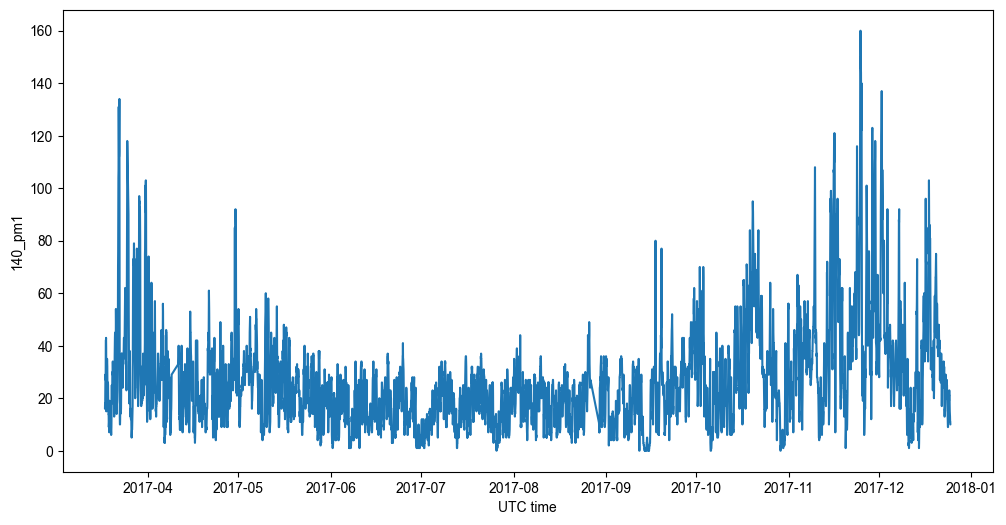

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='UTC time', 
             y='140_pm1', 
             data=new_sensor_dict[140] 
             )

From the plot we can see, that data starts somewhere in march. We're going to check, when exacly measurements starts.  

In [72]:
def get_valid_indexes(data_frame):
    first_valid_indexes = {}
    first_valid_dates = {}
    for column in data_frame.columns:
        if column[:3].isdigit():
            valid_index = data_frame[column].first_valid_index()
            first_valid_indexes[column] = valid_index
            valid_date = data_frame.iloc[valid_index]['UTC time']
            first_valid_dates[column] = valid_date
    valid_indexes = pd.Series(first_valid_indexes, name='first_valid_index')
    valid_dates = pd.Series(first_valid_dates, name='datetime_of_index')
    valid_index_frame = pd.concat([valid_indexes, valid_dates], axis=1)
    return valid_index_frame

In [73]:
# def get_valid_indexes_all(sensor_dictionary):
#     for data_frame in sensor_dictionary:
#         first_valid_dict = 
#         for column in data_frame.columns:
#             if column[:3].isdigit():
#                 valid_index = data_frame[column].first_valid_index()
#                 first_valid_list.append(valid_index)
#         return first_valid_list

In [74]:
valid_index_df_140 = get_valid_indexes(new_sensor_dict[140])

In [75]:
valid_index_df_140

first_valid_index   datetime_of_index
140_temperature               1811 2017-03-17 11:00:00
140_humidity                  1811 2017-03-17 11:00:00
140_pressure                  1811 2017-03-17 11:00:00
140_pm1                       1811 2017-03-17 11:00:00
140_pm25                      1811 2017-03-17 11:00:00
140_pm10                      1811 2017-03-17 11:00:00

In the created data frame we can see, that all mesurements start 2017-03-17. We can also notice, it's now just none feature, but all measurements start 2017-03-17. The gap is significant. Moreover, tha data shows seasonality, and in the case of pm measurements, it changes from one sensor to another. For this reasons we decided to **exclude sensor no 140** from future analysis.

Next on our list in sensor no 174. The previous results shows 14% nan ratio in every column. 

<AxesSubplot: xlabel='UTC time', ylabel='174_pm1'>

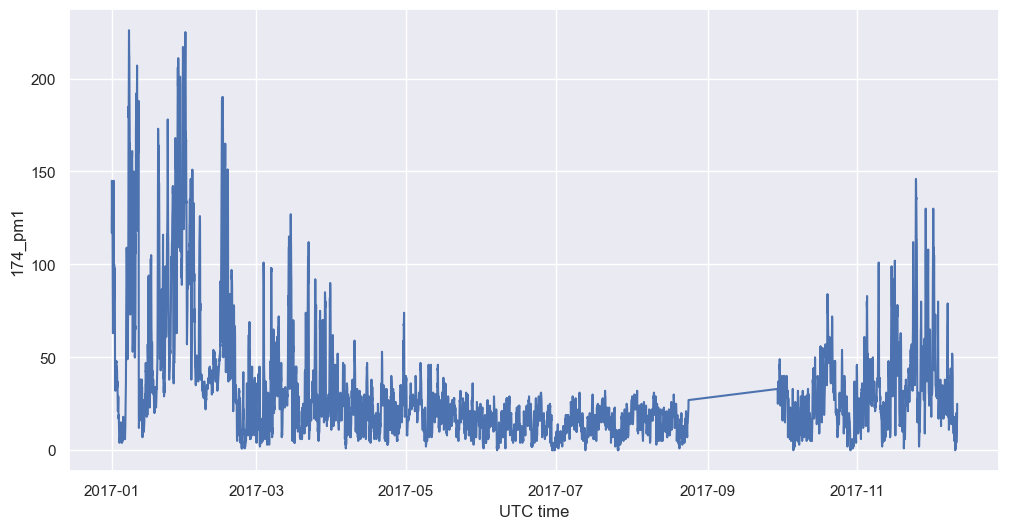

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='174_pm1', 
             data=new_sensor_dict[174] 
             )

In [77]:
get_valid_indexes(new_sensor_dict[174])

first_valid_index datetime_of_index
174_temperature                  0        2017-01-01
174_humidity                     0        2017-01-01
174_pressure                     0        2017-01-01
174_pm1                          0        2017-01-01
174_pm25                         0        2017-01-01
174_pm10                         0        2017-01-01

We can notice that data starts, as is should, from 2022-01-01. The gap starts around august. We going to examine this case.

<AxesSubplot: xlabel='UTC time', ylabel='174_pm1'>

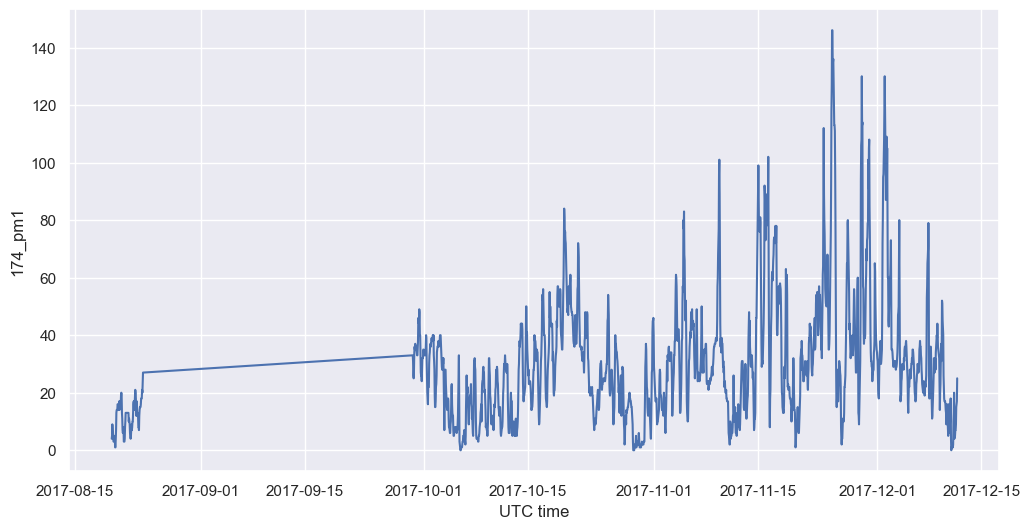

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='174_pm1', 
             data=new_sensor_dict[174].iloc[5544:]
             )

The gap starts in 2017-08-24 and couninous till 2019-09-29. Another one begins in 2017-12-11 adn ends in 2017-12-25. To save the rest of the data, and to maintain data continuity, we raplace the missing values with equivalents from nerby sensor. 

In [79]:
# period from 2017-08-24 to 2019-09-29
new_sensor_dict[174].iloc[5646:6514] = new_sensor_dict[204].iloc[5646:6514]

In [80]:
# period from 2017-12-11 to 2017-12-25
new_sensor_dict[174].iloc[8275:8592] = new_sensor_dict[204].iloc[8275:8592]

After the replacement we can see, that the data is continuous. 

<AxesSubplot: xlabel='UTC time', ylabel='174_pm1'>

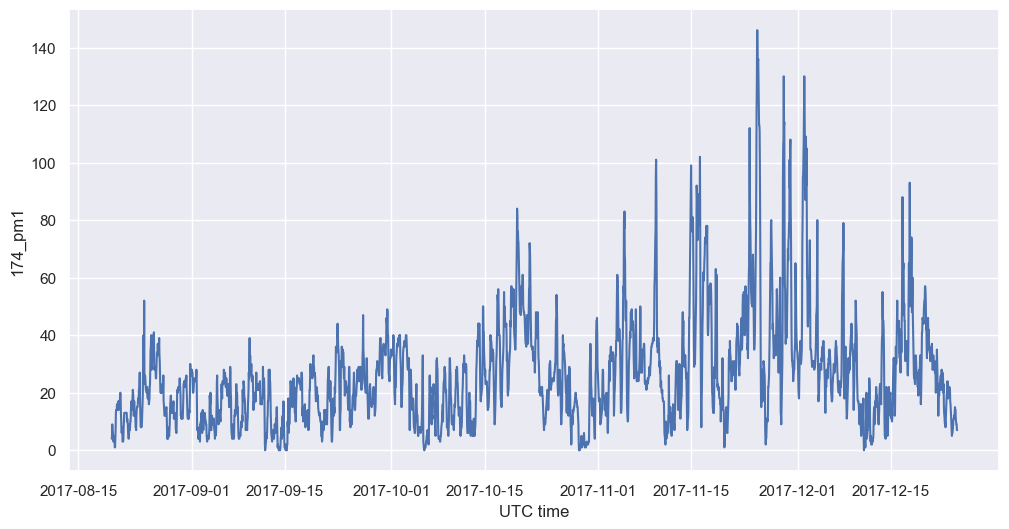

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='174_pm1', 
             data=new_sensor_dict[174].iloc[5544:]
             )

In [82]:
#pd.set_option('display.max_rows',1000)
new_sensor_dict[174][new_sensor_dict[174].isna().any(axis=1)]

sensor_id            UTC time  174_temperature  174_humidity  \
113         174 2017-01-05 17:00:00              NaN           NaN   
114         174 2017-01-05 18:00:00              NaN           NaN   
115         174 2017-01-05 19:00:00              NaN           NaN   
116         174 2017-01-05 20:00:00              NaN           NaN   
117         174 2017-01-05 21:00:00              NaN           NaN   
118         174 2017-01-05 22:00:00              NaN           NaN   
1189        174 2017-02-19 13:00:00              4.0          78.0   
1190        174 2017-02-19 14:00:00              3.0          78.0   
1191        174 2017-02-19 15:00:00              4.0          78.0   
1192        174 2017-02-19 16:00:00              3.0          76.0   
1193        174 2017-02-19 17:00:00              1.0          75.0   
1194        174 2017-02-19 18:00:00              1.0          75.0   
1195        174 2017-02-19 19:00:00              0.0          75.0   
1196        174 2017-02-19 20:00:00              0.0          74.0   
1197        174 2017-02-19 21:00:00              0.0          74.0   
1198        174 2017-02-19 22:00:00              0.0          75.0   
1199        174 2017-02-19 23:00:00              0.0          76.0   
1200        174 2017-02-20 00:00:00              0.0          76.0   
1201        174 2017-02-20 01:00:00              0.0          77.0   
1202        174 2017-02-20 02:00:00              0.0          78.0   
1203        174 2017-02-20 03:00:00              0.0          78.0   
1204        174 2017-02-20 04:00:00              0.0          80.0   
1205        174 2017-02-20 05:00:00              0.0          83.0   
1206        174 2017-02-20 06:00:00              0.0          83.0   
1207        174 2017-02-20 07:00:00              2.0          79.0   
1208        174 2017-02-20 08:00:00              3.0          77.0   
1209        174 2017-02-20 09:00:00              3.0          77.0   
1210        174 2017-02-20 10:00:00              5.0          78.0   
1211        174 2017-02-20 11:00:00              6.0          77.0   
1212        174 2017-02-20 12:00:00              7.0          77.0   
1213        174 2017-02-20 13:00:00              7.0          75.0   
1239        174 2017-02-21 15:00:00              5.0           NaN   
1289        174 2017-02-23 17:00:00              6.0           NaN   
3926        174 2017-06-13 14:00:00              NaN           NaN   
3927        174 2017-06-13 15:00:00              NaN           NaN   
4118        174 2017-06-21 14:00:00              NaN           NaN   
4119        174 2017-06-21 15:00:00              NaN           NaN   
4120        174 2017-06-21 16:00:00              NaN           NaN   
4121        174 2017-06-21 17:00:00              NaN           NaN   
5543        174 2017-08-19 23:00:00              NaN           NaN   
5590        174 2017-08-21 22:00:00              NaN           NaN   
5591        174 2017-08-21 23:00:00              NaN           NaN   
5592        174 2017-08-22 00:00:00              NaN           NaN   
5593        174 2017-08-22 01:00:00              NaN           NaN   
5594        174 2017-08-22 02:00:00              NaN           NaN   
5595        174 2017-08-22 03:00:00              NaN           NaN   
5596        174 2017-08-22 04:00:00              NaN           NaN   
5597        174 2017-08-22 05:00:00              NaN           NaN   
6514        174 2017-09-29 10:00:00              NaN           NaN   
8467        204 2017-12-19 19:00:00              NaN           NaN   
8468        204 2017-12-19 20:00:00              NaN           NaN   
8592        174 2017-12-25 00:00:00              NaN           NaN   

      174_pressure  174_pm1  174_pm25  174_pm10  
113            NaN      NaN       NaN       NaN  
114            NaN      NaN       NaN       NaN  
115            NaN      NaN       NaN       NaN  
116            NaN      NaN       NaN       NaN  
117            NaN      NaN       NaN       N

Now, the ratio of nans is below 10 %. The rest of nans is going to be filled in further steps, together with nans with other sensors

In the data from sensor no 177 we can see 35 % of nans in pressure. 

<AxesSubplot: xlabel='UTC time', ylabel='177_pressure'>

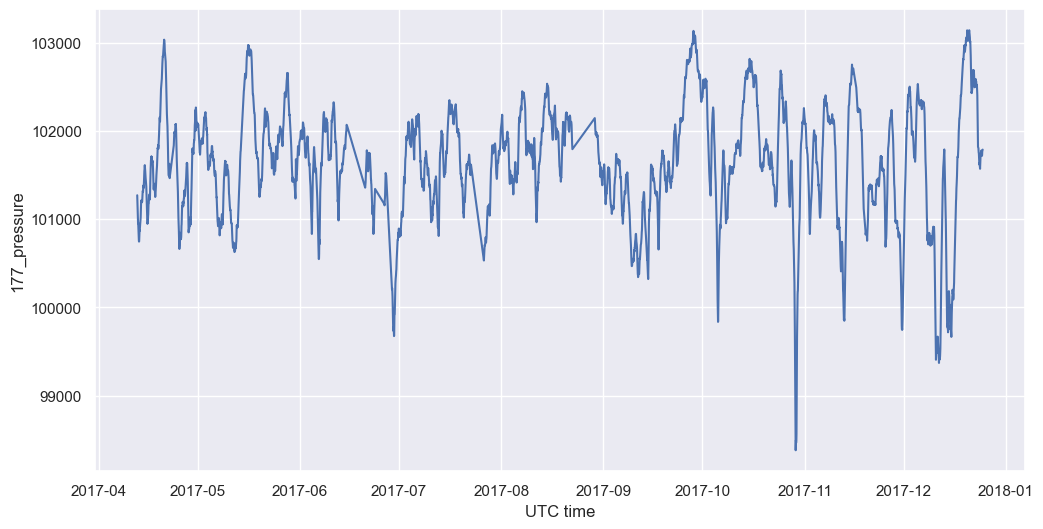

In [90]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='177_pressure', 
             data=new_sensor_dict[177]
             )

In [94]:
get_valid_indexes(new_sensor_dict[177])

first_valid_index   datetime_of_index
177_temperature                  0 2017-01-01 00:00:00
177_humidity                     0 2017-01-01 00:00:00
177_pressure                  2439 2017-04-12 15:00:00
177_pm1                          0 2017-01-01 00:00:00
177_pm25                         0 2017-01-01 00:00:00
177_pm10                         0 2017-01-01 00:00:00

We can see that first valid measurement of pressure appears in 2017-04-12. The lack of data seems serious, but the pressure is not a value, which changes remarkably within the city borders, this is why we are going to copy pressure measurements form nearby sensor- no 205. 

In [109]:
new_sensor_dict[177].loc[:2439, '177_pressure'] = new_sensor_dict[204].loc[:2439,'204_pressure']

<AxesSubplot: xlabel='UTC time', ylabel='177_pressure'>

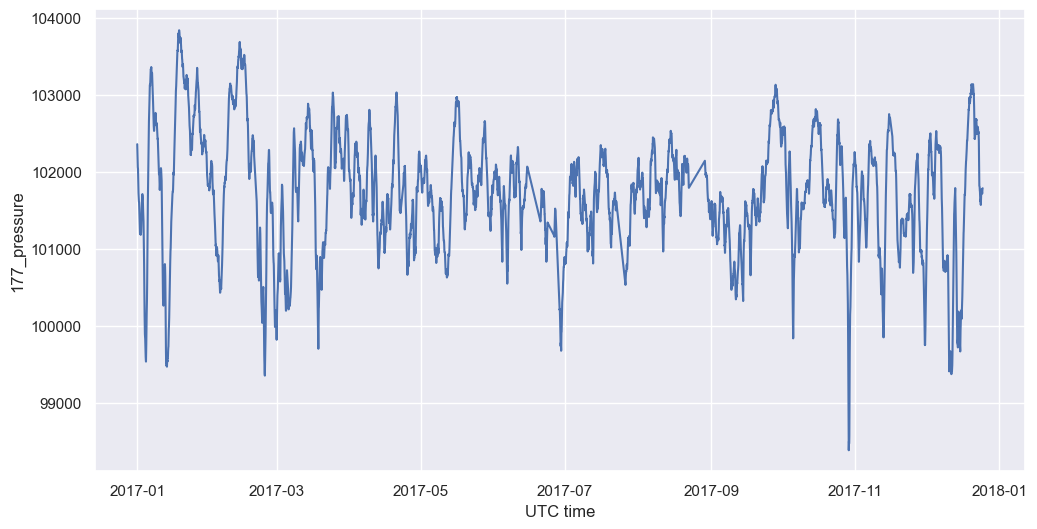

In [111]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='177_pressure', 
             data=new_sensor_dict[177]
             )

The missing values are filled with data fram sensor no 204.

182_temperature :  0.12
182_humidity :  0.12
182_pm1 :  0.12
182_pm25 :  0.12
182_pm10 :  0.12

There is also 12% missing data in every column, except air pressure, in data from sensor no 182. 

In [83]:
get_valid_indexes(new_sensor_dict[182])

first_valid_index datetime_of_index
182_temperature                  0        2017-01-01
182_humidity                     0        2017-01-01
182_pressure                     0        2017-01-01
182_pm1                          0        2017-01-01
182_pm25                         0        2017-01-01
182_pm10                         0        2017-01-01

We can see, the data starts as it should- 1st of January. 

<AxesSubplot: xlabel='UTC time', ylabel='182_pm1'>

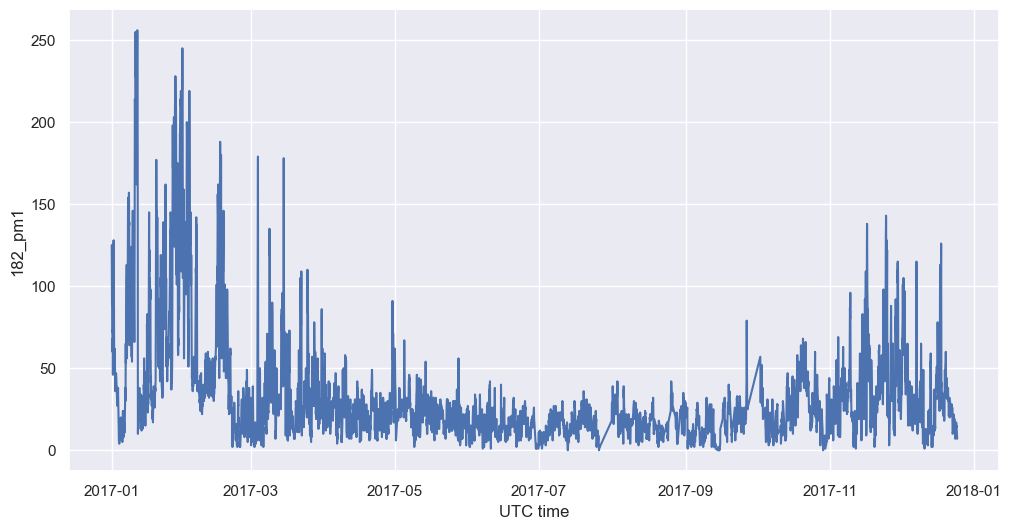

In [147]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='182_pm1', 
             data=new_sensor_dict[182]
             )

In [146]:
new_sensor_dict[182] 

sensor_id            UTC time  182_temperature  182_humidity  \
0           182 2017-01-01 00:00:00              0.0          54.0   
1           182 2017-01-01 01:00:00              0.0          53.0   
2           182 2017-01-01 02:00:00              0.0          52.0   
3           182 2017-01-01 03:00:00              0.0          51.0   
4           182 2017-01-01 04:00:00              0.0          51.0   
5           182 2017-01-01 05:00:00              0.0          50.0   
6           182 2017-01-01 06:00:00              0.0          49.0   
7           182 2017-01-01 07:00:00              0.0          48.0   
8           182 2017-01-01 08:00:00              0.0          45.0   
9           182 2017-01-01 09:00:00              3.0          40.0   
10          182 2017-01-01 10:00:00              9.0          31.0   
11          182 2017-01-01 11:00:00              9.0          30.0   
12          182 2017-01-01 12:00:00              8.0          31.0   
13          182 2017-01-01 13:00:00              6.0          34.0   
14          182 2017-01-01 14:00:00              5.0          37.0   
15          182 2017-01-01 15:00:00              3.0          43.0   
16          182 2017-01-01 16:00:00              1.0          48.0   
17          182 2017-01-01 17:00:00              0.0          50.0   
18          182 2017-01-01 18:00:00             -1.0          53.0   
19          182 2017-01-01 19:00:00             -2.0          55.0   
20          182 2017-01-01 20:00:00              0.0          54.0   
21          182 2017-01-01 21:00:00              0.0          52.0   
22          182 2017-01-01 22:00:00              0.0          52.0   
23          182 2017-01-01 23:00:00              0.0          52.0   
24          182 2017-01-02 00:00:00             -1.0          55.0   
25          182 2017-01-02 01:00:00              0.0          52.0   
26          182 2017-01-02 02:00:00             -2.0          54.0   
27          182 2017-01-02 03:00:00             -2.0          55.0   
28          182 2017-01-02 04:00:00             -2.0          56.0   
29          182 2017-01-02 05:00:00             -3.0          57.0   
30          182 2017-01-02 06:00:00             -2.0          54.0   
31          182 2017-01-02 07:00:00             -1.0          52.0   
32          182 2017-01-02 08:00:00              0.0          53.0   
33          182 2017-01-02 09:00:00              2.0          49.0   
34          182 2017-01-02 10:00:00              3.0          49.0   
35          182 2017-01-02 11:00:00              3.0          49.0   
36          182 2017-01-02 12:00:00              3.0          50.0   
37          182 2017-01-02 13:00:00              2.0          58.0   
38          182 2017-01-02 14:00:00              1.0          64.0   
39          182 2017-01-02 15:00:00              0.0          68.0   
40          182 2017-01-02 16:00:00              0.0          69.0   
41          182 2017-01-02 17:00:00              0.0          68.0   
42          182 2017-01-02 18:00:00              0.0          67.0   
43          182 2017-01-02 19:00:00              0.0          67.0   
44          182 2017-01-02 20:00:00              0.0          67.0   
45          182 2017-01-02 21:00:00              0.0          66.0   
46          182 2017-01-02 22:00:00              1.0          64.0   
47          182 2017-01-02 23:00:00              0.0          65.0   
48          182 2017-01-03 00:00:00              0.0          64.0   
49          182 2017-01-03 01:00:00              0.0          63.0   
50          182 2017-01-03 02:00:00              0.0          63.0   
51          182 2017-01-03 03:00:00              0.0          62.0   
52          182 2017-01-03 04:00:00              0.0          62.0   
53          182 2017-01-03 05:00:00              0.0          61.0   
54          182 2017-01-03 06:00:00              0.0          62.0   
55          182 2017-01-03 07:00:00              0.0          59.0   
56          182 

First gap

In [157]:
new_sensor_dict[182].loc[4961:5079,'182_temperature'] = new_sensor_dict[180].loc[4961:5079,'180_temperature']

In [159]:
new_sensor_dict[182].loc[4961:5079,'182_humidity'] = new_sensor_dict[180].loc[4961:5079,'180_humidity']

In [160]:
new_sensor_dict[182].loc[4961:5079,'182_pressure'] = new_sensor_dict[180].loc[4961:5079,'180_pressure']

In [161]:
new_sensor_dict[182].loc[4961:5079,'182_pm1'] = new_sensor_dict[180].loc[4961:5079,'180_pm1']

In [162]:
new_sensor_dict[182].loc[4961:5079,'182_pm25'] = new_sensor_dict[180].loc[4961:5079,'180_pm25']

In [158]:
new_sensor_dict[182].loc[4961:5079,'182_pm10'] = new_sensor_dict[180].loc[4961:5079,'180_pm10']

Second gap

In [137]:
new_sensor_dict[182].loc[5442:5466,'182_temperature'] = new_sensor_dict[180].loc[5442:5466,'180_temperature']

In [138]:
new_sensor_dict[182].loc[5442:5466,'182_humidity'] = new_sensor_dict[180].loc[5442:5466,'180_humidity']

In [139]:
new_sensor_dict[182].loc[5442:5466,'182_pressure'] = new_sensor_dict[180].loc[5442:5466,'180_pressure']

In [141]:
new_sensor_dict[182].loc[5442:5466,'182_pm1'] = new_sensor_dict[180].loc[5442:5466,'180_pm1']

In [140]:
new_sensor_dict[182].loc[5442:5466,'182_pm25'] = new_sensor_dict[180].loc[5442:5466,'180_pm25']

In [142]:
new_sensor_dict[182].loc[5442:5466,'182_pm10'] = new_sensor_dict[180].loc[5442:5466,'180_pm10']

Third gap

In [127]:
new_sensor_dict[182].loc[5803:6065,'182_temperature'] = new_sensor_dict[180].loc[5803:6065,'180_temperature']

In [129]:
new_sensor_dict[182].loc[5803:6065,'182_humidity'] = new_sensor_dict[180].loc[5803:6065,'180_humidity']

In [130]:
new_sensor_dict[182].loc[5803:6065,'182_pressure'] = new_sensor_dict[180].loc[5803:6065,'180_pressure']

In [131]:
new_sensor_dict[182].loc[5803:6065,'182_pm1'] = new_sensor_dict[180].loc[5803:6065,'180_pm1']

In [132]:
new_sensor_dict[182].loc[5803:6065,'182_pm25'] = new_sensor_dict[180].loc[5803:6065,'180_pm25']

In [133]:
new_sensor_dict[182].loc[5803:6065,'182_pm10'] = new_sensor_dict[180].loc[5803:6065,'180_pm10']

In [ ]:
Fourth gap

In [149]:
new_sensor_dict[182].loc[6464:6590,'182_temperature'] = new_sensor_dict[180].loc[6464:6590,'180_temperature']

In [150]:
new_sensor_dict[182].loc[6464:6590,'182_humidity'] = new_sensor_dict[180].loc[6464:6590,'180_humidity']

In [151]:
new_sensor_dict[182].loc[6464:6590,'182_pressure'] = new_sensor_dict[180].loc[6464:6590,'180_pressure']

In [152]:
new_sensor_dict[182].loc[6464:6590,'182_pm1'] = new_sensor_dict[180].loc[6464:6590,'180_pm1']

In [153]:
new_sensor_dict[182].loc[6464:6590,'182_pm25'] = new_sensor_dict[180].loc[6464:6590,'180_pm25']

In [154]:
new_sensor_dict[182].loc[6464:6590,'182_pm10'] = new_sensor_dict[180].loc[6464:6590,'180_pm10']

<AxesSubplot: xlabel='UTC time', ylabel='182_pm1'>

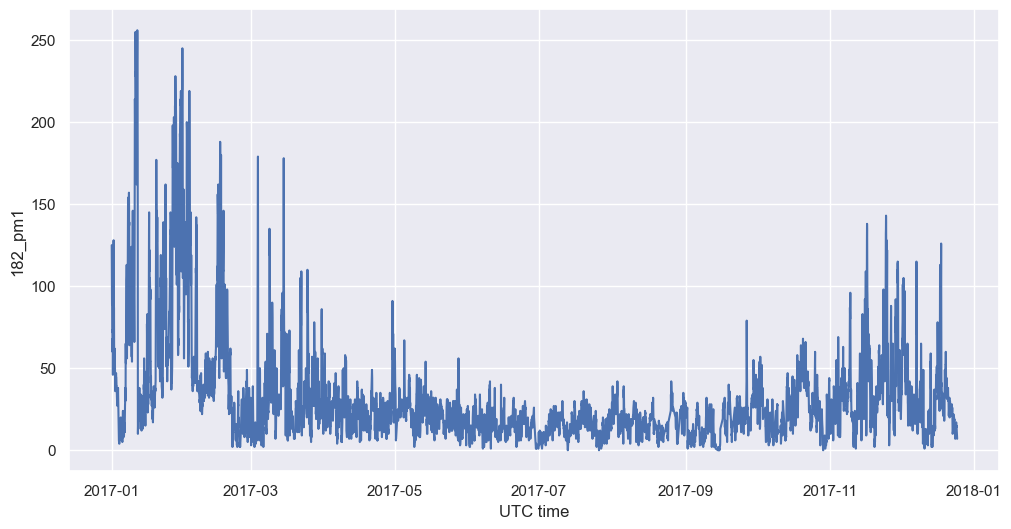

In [163]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='182_pm1', 
             data=new_sensor_dict[182]
             )

In the sensor no 195 we can also see 15% lack of data. 

<AxesSubplot: xlabel='UTC time', ylabel='195_pm1'>

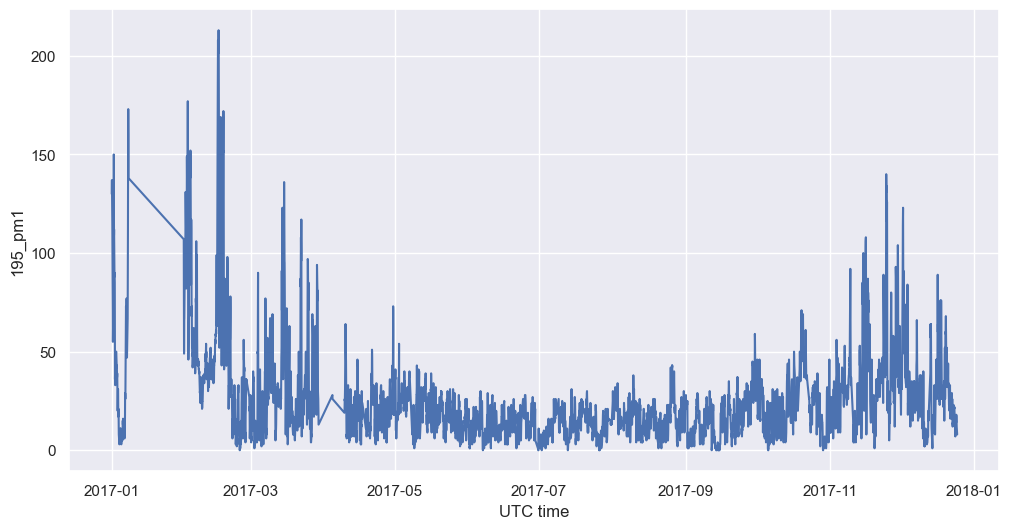

In [168]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='195_pm1', 
             data=new_sensor_dict[195]
             )

We can distinguish two gaps in data. We're going to fill it with nearby sensor data- no. 210

In [174]:
new_sensor_dict[195].loc[172:731,'195_temperature'] = new_sensor_dict[210].loc[172:731,'210_temperature']

In [175]:
new_sensor_dict[195].loc[172:731,'195_humidity'] = new_sensor_dict[210].loc[172:731,'210_humidity']

In [177]:
new_sensor_dict[195].loc[172:731,'195_pressure'] = new_sensor_dict[210].loc[172:731,'210_pressure']

In [178]:
new_sensor_dict[195].loc[172:731,'195_pm1'] = new_sensor_dict[210].loc[172:731,'210_pm1']

In [179]:
new_sensor_dict[195].loc[172:731,'195_pm25'] = new_sensor_dict[210].loc[172:731,'210_pm25']

In [180]:
new_sensor_dict[195].loc[172:731,'195_pm10'] = new_sensor_dict[210].loc[172:731,'210_pm10']

In [185]:
new_sensor_dict[195].loc[2103:2364,'195_temperature'] = new_sensor_dict[210].loc[2103:2364,'210_temperature']

In [186]:
new_sensor_dict[195].loc[2103:2364,'195_humidity'] = new_sensor_dict[210].loc[2103:2364,'210_humidity']

In [187]:
new_sensor_dict[195].loc[2103:2364,'195_pressure'] = new_sensor_dict[210].loc[2103:2364,'210_pressure']

In [188]:
new_sensor_dict[195].loc[2103:2364,'195_pm1'] = new_sensor_dict[210].loc[2103:2364,'210_pm1']

In [189]:
new_sensor_dict[195].loc[2103:2364,'195_pm25'] = new_sensor_dict[210].loc[2103:2364,'210_pm25']

In [190]:
new_sensor_dict[195].loc[172:731,'195_pm10'] = new_sensor_dict[210].loc[172:731,'210_pm10']

<AxesSubplot: xlabel='UTC time', ylabel='195_pm1'>

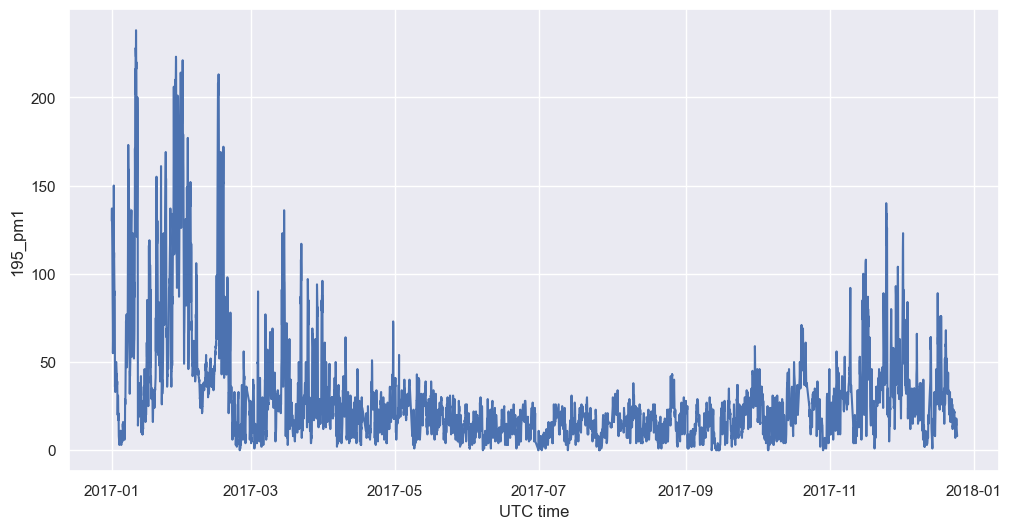

In [191]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='195_pm1', 
             data=new_sensor_dict[195]
             )

203_temperature :  0.18
203_humidity :  0.18
203_pm1 :  0.18
203_pm25 :  0.18
203_pm10 :  0.18

We can also notice, around 18% lack in data in sensor no 203. 

<AxesSubplot: xlabel='UTC time', ylabel='203_pm1'>

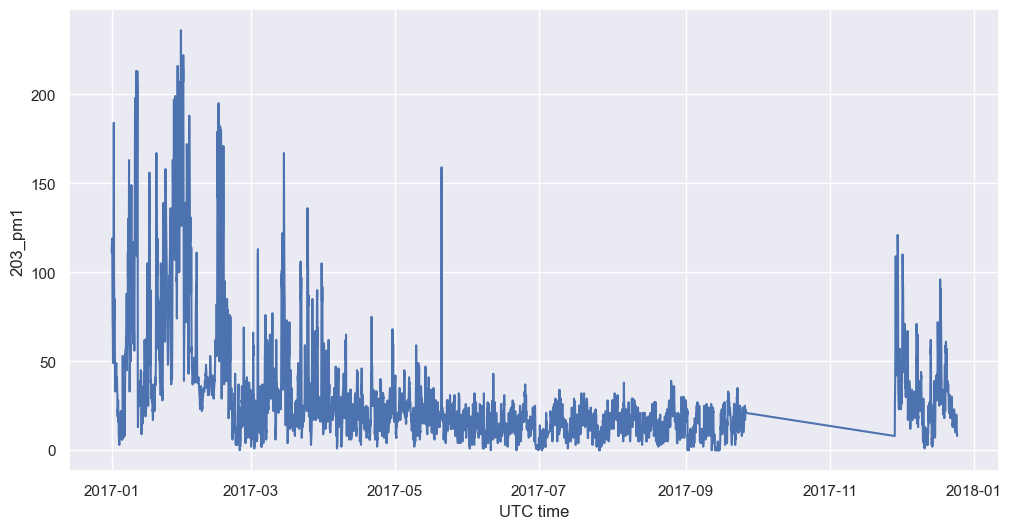

In [193]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='203_pm1', 
             data=new_sensor_dict[203]
             )

We can spot one remarkabe gap. We're going to use the same aproach as in previous sensor. 

In [195]:
new_sensor_dict[203].loc[6444:7956,'203_temperature'] = new_sensor_dict[194].loc[6444:7956,'194_temperature']

In [196]:
new_sensor_dict[203].loc[6444:7956,'203_humidity'] = new_sensor_dict[194].loc[6444:7956,'194_humidity']

In [197]:
new_sensor_dict[203].loc[6444:7956,'203_pressure'] = new_sensor_dict[194].loc[6444:7956,'194_pressure']

In [198]:
new_sensor_dict[203].loc[6444:7956,'203_pm1'] = new_sensor_dict[194].loc[6444:7956,'194_pm1']

In [199]:
new_sensor_dict[203].loc[6444:7956,'203_pm25'] = new_sensor_dict[194].loc[6444:7956,'194_pm25']

In [200]:
new_sensor_dict[203].loc[6444:7956,'203_pm10'] = new_sensor_dict[194].loc[6444:7956,'194_pm10']

<AxesSubplot: xlabel='UTC time', ylabel='203_pm1'>

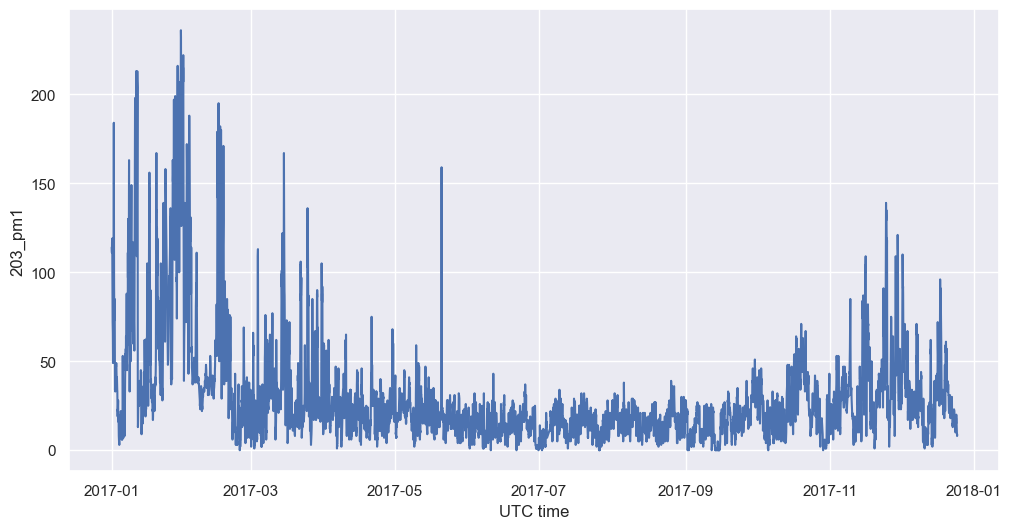

In [201]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='UTC time', 
             y='203_pm1', 
             data=new_sensor_dict[203]
             )

In [203]:
nans_ratio_above_10proc(new_sensor_dict)

140_temperature :  0.24
140_humidity :  0.24
140_pressure :  0.22
140_pm1 :  0.23
140_pm25 :  0.23
140_pm10 :  0.23
622_temperature :  0.38
622_humidity :  0.38
622_pressure :  0.35
622_pm1 :  0.35
622_pm25 :  0.35
622_pm10 :  0.35
895_temperature :  0.37
895_humidity :  0.37
895_pressure :  0.26
895_pm1 :  0.26
895_pm25 :  0.26
895_pm10 :  0.26


['140_temperature',
 '140_humidity',
 '140_pressure',
 '140_pm1',
 '140_pm25',
 '140_pm10',
 '622_temperature',
 '622_humidity',
 '622_pressure',
 '622_pm1',
 '622_pm25',
 '622_pm10',
 '895_temperature',
 '895_humidity',
 '895_pressure',
 '895_pm1',
 '895_pm25',
 '895_pm10']

We can observe a 35-38% lack of data in each column of sensor no 622 and 26-37 % lack of data in each column of data from sensor nt 895. Filling that much data may cause problems in trainig a model, this is why we decided to exclude this sensort from future analysis. 

In [210]:
pop_140 = new_sensor_dict.pop(140)
dropped_frames[140] = pop_140

In [211]:
pop_622 = new_sensor_dict.pop(622)
dropped_frames[622] = pop_622

In [212]:
pop_895 = new_sensor_dict.pop(895)
dropped_frames[895] = pop_895

In [213]:
nans_ratio_above_10proc(new_sensor_dict)

[]

In [206]:
simple_dict= {'a':1, 'b':2, 'c':3}
simple_dict

{'a': 1, 'b': 2, 'c': 3}

In [207]:
dropped = simple_dict.pop('b')

In [208]:
dropped

2

In [209]:
simple_dict

{'a': 1, 'c': 3}

In [86]:
def nans_ratio_below_2proc(data_frame):
    #print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        nan_ratio = ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2)
        if nan_ratio < 0.015:
            print(column,': ', nan_ratio)

In [87]:
apply_function(new_sensor_dict, nans_ratio_below_2proc)

NameError: name 'apply_function' is not defined

In [ ]:
def nan_ratio_for_frame(sensor_dictionary):
    nan_ratio_sums = {}
    for key in sensor_dictionary:
        column_names = sensor_dictionary[key].columns
        nan_ratio_sum = 0
        for column in column_names:
            nan_ratio= ((sensor_dictionary[key][column].isnull().sum())/(len(sensor_dictionary[key][column])))
            nan_ratio_sum += nan_ratio
        nan_ratio_sums[key] = nan_ratio_sum
    return nan_ratio_sums

In [ ]:
nan_results = nan_ratio_for_frame(new_sensor_dict)

In [ ]:
def ten_min_values(ratio_sums_dict):
    top_10_values = sorted(ratio_sums_dict.values())[:10]
    final_score = []
    for value in top_10_values:
        for key in ratio_sums_dict:
            if ratio_sums_dict[key] == value:
                final_score.append(key)
    return set(final_score) 

In [ ]:
min_nan_ratio_sensors = ten_min_values(nan_results)
min_nan_ratio_sensors

In [ ]:
new_sensor_dict[212]

In [ ]:
column_name = str(212) + '_pressure'
column_name

In [ ]:
def pascals_to_hectopascals(sensors_dictionary):
    for key in sensors_dictionary:
        column_name = str(key) + '_pressure'
        new_sensor_dict[key][column_name] = new_sensor_dict[key][column_name]/100

In [ ]:
pascals_to_hectopascals(new_sensor_dict)

In [ ]:
new_sensor_dict[212]

In [ ]:
new_sensor_dict[212].info()

In [ ]:
new_sensor_dict[212].loc[546:548,:]

In [ ]:
# shows all rows with nan in any column
new_sensor_dict[212][new_sensor_dict[212].isna().any(axis=1)]

In [ ]:
# temperature = new_sensor_dict[212]['212_temperature']


# for index, value in enumerate(temperature):
#     print(type(value))
#     if np.isnan(value) and index !=0:
#         prev_val = temperature[index-1]
#         print(prev_val)
#         temperature[index]=prev_val

In [ ]:
def replace_nan_with_prev(data_frame):
    for column in data_frame:
        if column[0:3].isdigit():
            for index, value in enumerate(data_frame[column]):
                float(value)
                if np.isnan([value]) and index !=0:
                    prev_val = data_frame[column][index-1]
                    data_frame[column][index]=prev_val

In [ ]:
# sensors chosen to model
min_nan_ratio_sensors

In [ ]:
replace_nan_with_prev(new_sensor_dict[212])

In [ ]:
new_sensor_dict[212][new_sensor_dict[212].isna().any(axis=1)]

In [ ]:
new_sensor_dict[226][new_sensor_dict[226].isna().any(axis=1)]

In [ ]:
replace_nan_with_prev(new_sensor_dict[226])

In [ ]:
new_sensor_dict[226][new_sensor_dict[226].isna().any(axis=1)]

In [ ]:
new_sensor_dict[220][new_sensor_dict[220].isna().any(axis=1)]

**dopytać o tę uwagę**

In [ ]:
replace_nan_with_prev(new_sensor_dict[220])

In [ ]:
new_sensor_dict[220][new_sensor_dict[220].isna().any(axis=1)]

In [ ]:
set(min_nan_ratio_sensors)

In [ ]:
pd.set_option('display.max_rows',200)

In [ ]:
new_sensor_dict[171][new_sensor_dict[171].isna().any(axis=1)]

In [ ]:
replace_nan_with_prev(new_sensor_dict[171])

In [ ]:
new_sensor_dict[171][new_sensor_dict[171].isna().any(axis=1)]

In [ ]:
new_sensor_dict[180][new_sensor_dict[180].isna().any(axis=1)]

In [ ]:
replace_nan_with_prev(new_sensor_dict[180])

In [ ]:
new_sensor_dict[171][new_sensor_dict[171].isna().any(axis=1)]

In [ ]:
set(min_nan_ratio_sensors)

In [ ]:
new_sensor_dict[204][new_sensor_dict[204].isna().any(axis=1)]

In [ ]:
replace_nan_with_prev(new_sensor_dict[204])

In [ ]:
new_sensor_dict[204][new_sensor_dict[204].isna().any(axis=1)]

In [ ]:
new_sensor_dict[214][new_sensor_dict[214].isna().any(axis=1)]

In [ ]:
replace_nan_with_prev(new_sensor_dict[214])

In [ ]:
new_sensor_dict[214][new_sensor_dict[214].isna().any(axis=1)]

In [ ]:
new_sensor_dict[218][new_sensor_dict[218].isna().any(axis=1)]

In [ ]:
replace_nan_with_prev(new_sensor_dict[218])

In [ ]:
new_sensor_dict[218][new_sensor_dict[218].isna().any(axis=1)]

In [ ]:
set(min_nan_ratio_sensors)

In [ ]:
new_sensor_dict[221][new_sensor_dict[221].isna().any(axis=1)]

In [ ]:
replace_nan_with_prev(new_sensor_dict[221])

In [ ]:
new_sensor_dict[221][new_sensor_dict[221].isna().any(axis=1)]

In [ ]:
new_sensor_dict[226][new_sensor_dict[226].isna().any(axis=1)]

In [ ]:
new_sensor_dict[228][new_sensor_dict[228].isna().any(axis=1)]

In [ ]:
replace_nan_with_prev(new_sensor_dict[228])

In [ ]:
new_sensor_dict[228][new_sensor_dict[228].isna().any(axis=1)]

In [ ]:
pd.set_option('display.max_rows',10)

In [ ]:
new_sensor_dict[171]

## Training/ testing sets

In [ ]:
def create_train_set(sensor_dictionary, sensor_ids, n_train_samples): #(sensor_dictionary,sensor_ids, n_samples):
    train_sensor_ids= sensor_ids[:n_train_samples]
    test_sensor_ids= sensor_ids[n_train_samples:]
    train_set = {}
    test_set = {}
    for frame in sensor_dictionary:
        if frame in train_sensor_ids:
            train_set[frame] = sensor_dictionary[frame]
    for frame in sensor_dictionary:
        if frame in test_sensor_ids:
            test_set[frame] = sensor_dictionary[frame]
    return train_set, test_set

In [ ]:
min_nan_ratio_sensors = list(set(min_nan_ratio_sensors))
min_nan_ratio_sensors

In [ ]:
train_set, test_set = create_train_set(new_sensor_dict, min_nan_ratio_sensors, 8)
train_set.keys()

In [ ]:
test_set.keys()

In [ ]:
create_train_set(min_nan_ratio_sensors, 8)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.locator_params(axis='x', nbins=20)
ax.plot(df['UTC time'], df['220_temperature'])
ax.xaxis.set_tick_params(rotation=90)
#plt.plot(df['UTC time'], df['3_temperature'])
plt.show()

# może być temp. średnia, albo dla dnia (też średnia)

## Standarization

In [ ]:
for column in train_set[171]:
    if column[0:3].isdigit():
        column_mean = train_set[171][column].mean()
        column_std = train_set[171][column].std()
        train_set[171][column] = (train_set[171][column] - column_mean)/column_std

In [ ]:
# scaler = StandardScaler()

# scaled_train_set = scaler.fit_transform(train_set[171])

#train_set[171].describe()
def standarize_frame(sensor_set):
standarized_set = {}

for sensor_frame in sensor_set:
    for column in train_set[171]:
        if column[0:3].isdigit():
            column_mean = train_set[171][column].mean()
            column_std = train_set[171][column].std()
            train_set[171][column] = (train_set[171][column] - column_mean)/column_std

In [ ]:
train_set[171]

In [ ]:
train_set[171].describe()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.locator_params(axis='x', nbins=20)
ax.plot(new_sensor_dict[172]['UTC time'], new_sensor_dict[172]['172_temperature'])
ax.xaxis.set_tick_params(rotation=90)
plt.show()

Czujnik 857 uruchomiony we wrześniu. Dalej ciągłość zapisów. Co w tej sytuacji? 

### Odległości między punktami i wysokość npm 

odległości między punktami- gotowe biblioteki. 

import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print geopy.distance.geodesic(coords_1, coords_2).km

import mpu

Point one
lat1 = 52.2296756
lon1 = 21.0122287

Point two
lat2 = 52.406374
lon2 = 16.9251681

What you were looking for
dist = mpu.haversine_distance((lat1, lon1), (lat2, lon2))
print(dist)  # gives 278.45817507541943.

https://wrf-python.readthedocs.io/en/latest/internal_api/generated/wrf.g_geoht.get_height.html

In [ ]:
tutaj spróbować:
https://gis.stackexchange.com/questions/338392/getting-elevation-for-multiple-lat-long-coordinates-in-python

import rasterio

coords = ((147.363,-36.419), (147.361,-36.430))
elevation = 'srtm_66_20.tif'

with rasterio.open(elevation) as src:
    vals = src.sample(coords)
    for val in vals:
        print(val[0]) #val is an array of values, 1 element 
                      #per band. src is a single band raster 
                      #so we only need val[0]

Do tworzenia wysokości: 

import requests
import urllib
import pandas as pd
 
USGS Elevation Point Query Service
url = r'https://nationalmap.gov/epqs/pqs.php?'
 
coordinates with known elevation 
lat = [48.633, 48.733, 45.1947, 45.1962]
lon = [-93.9667, -94.6167, -93.3257, -93.2755]
 
create data frame
df = pd.DataFrame({
    'lat': lat,
    'lon': lon
})
 
def elevation_function(df, lat_column, lon_column):
    """Query service using lat, lon. add the elevation values as a new column."""
    elevations = []
    for lat, lon in zip(df[lat_column], df[lon_column]):
 
        # define rest query params
        params = {
            'output': 'json',
            'x': lon,
            'y': lat,
            'units': 'Meters'
        }
 
        # format query string and return query value
        result = requests.get((url + urllib.parse.urlencode(params)))
        elevations.append(result.json()['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation'])
 
    df['elev_meters'] = elevations

`elevation_function(df, 'lat', 'lon')`